In [1]:
import numpy as np
np.set_printoptions(suppress=True, linewidth=280)
from matplotlib import pyplot as plt
import tensorflow as tf
from poenta import Circuit, Config

%load_ext autoreload
%autoreload 2

In [2]:
config = Config(
    state_in = np.identity(30)[0], # vacuum
    objective = np.identity(30)[1], # 1 photon
    dtype=tf.complex128,
    num_layers=5,
    steps=1000,
    optimizer='Adam', 
    LR=0.001, 
    LR_schedule={0.1:0.001, 0.05:0.001, 0.01:0.0005, 0.005:0.0004, 0.001:0.0003}
)

circuit = Circuit(config)

In [3]:
circuit

+--------+--------+-----------+------------------------+
| Layers | Cutoff | Optimizer | Params (trainable/tot) |
+--------+--------+-----------+------------------------+
|   5    |   30   |    Adam   |         20/20          |
+--------+--------+-----------+------------------------+

In [4]:
circuit.parameters

+-------+---------------+--------+---------------+--------+
| Layer |     gamma     |  phi   |      zeta     | kappa  |
+-------+---------------+--------+---------------+--------+
|   1   |  0.008-0.001j | 0.006  | -0.005-0.018j | 0.013  |
|   2   |  0.005+0.000j | -0.009 | -0.011+0.008j | 0.015  |
|   3   |  0.012-0.009j | 0.010  | -0.006+0.003j | -0.005 |
|   4   |  0.009+0.006j | -0.007 | -0.017+0.009j | -0.007 |
|   5   | -0.006-0.008j | -0.003 |  0.002+0.002j | -0.002 |
+-------+---------------+--------+---------------+--------+

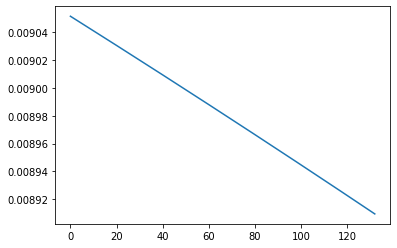

In [15]:
loss_list = circuit.minimize()
plt.plot(loss_list);

In [3]:
import time
from rich.progress import Progress

with Progress() as progress:

    task1 = progress.add_task("[red]Downloading...", total=1000)
    task2 = progress.add_task("[green]Processing...", total=1000)
    task3 = progress.add_task("[cyan]Cooking...", total=1000)

    while not progress.finished:
        progress.update(task1, advance=0.5)
        progress.update(task2, advance=0.3)
        progress.update(task3, advance=0.9)
        time.sleep(0.02)

KeyboardInterrupt: 

In [2]:
import rich

In [4]:
from rich.progress import track

In [5]:
for i in track(range(10)):
    time.sleep(0.09)

# Keras

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
np.set_printoptions(suppress=True, linewidth=250)
from poenta.keras import QuantumDevice, QuantumLayer

%load_ext autoreload
%autoreload 2

In [2]:
device = QuantumDevice(num_modes = 1, num_layers = 2, cutoff=3, dtype=tf.complex64)

In [3]:
device(tf.constant([1,0,0], dtype=tf.complex64))

about to call R
complex64
called R
about to call R
complex64
called R


<tf.Tensor: shape=(3,), dtype=complex64, numpy=array([ 0.9929139 +0.0017186j ,  0.02105671-0.10224357j, -0.04065187-0.03653317j], dtype=complex64)>

In [4]:
def loss(target, output):
    tf.abs(tf.reduce_sum(target - output))**2
    
device.compile(
    optimizer=keras.optimizers.Adam(),
    loss=loss,
    metrics=[loss])

In [5]:
device.fit(
    x = np.complex64(np.random.random((2, 3))),
    y = np.complex64(np.random.random((2, 3))),
    batch_size=1
)

about to call R
called R
about to call R
called R


ValueError: in user code:

    /Users/filippo/.pyenv/versions/3.8.2/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /Users/filippo/.pyenv/versions/3.8.2/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/filippo/.pyenv/versions/3.8.2/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/filippo/.pyenv/versions/3.8.2/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/filippo/.pyenv/versions/3.8.2/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:532 train_step  **
        loss = self.compiled_loss(
    /Users/filippo/.pyenv/versions/3.8.2/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:205 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /Users/filippo/.pyenv/versions/3.8.2/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:144 __call__
        return losses_utils.compute_weighted_loss(
    /Users/filippo/.pyenv/versions/3.8.2/lib/python3.8/site-packages/tensorflow/python/keras/utils/losses_utils.py:104 compute_weighted_loss
        losses = ops.convert_to_tensor_v2(losses)
    /Users/filippo/.pyenv/versions/3.8.2/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1278 convert_to_tensor_v2
        return convert_to_tensor(
    /Users/filippo/.pyenv/versions/3.8.2/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1341 convert_to_tensor
        ret = conversion_func(value, dtype=dtype, name=name, as_ref=as_ref)
    /Users/filippo/.pyenv/versions/3.8.2/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py:321 _constant_tensor_conversion_function
        return constant(v, dtype=dtype, name=name)
    /Users/filippo/.pyenv/versions/3.8.2/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py:261 constant
        return _constant_impl(value, dtype, shape, name, verify_shape=False,
    /Users/filippo/.pyenv/versions/3.8.2/lib/python3.8/site-packages/tensorflow/python/framework/constant_op.py:298 _constant_impl
        tensor_util.make_tensor_proto(
    /Users/filippo/.pyenv/versions/3.8.2/lib/python3.8/site-packages/tensorflow/python/framework/tensor_util.py:439 make_tensor_proto
        raise ValueError("None values not supported.")

    ValueError: None values not supported.


In [12]:
import numpy as np
import numba
import tensorflow as tf

# Numba/numpy

# @numba.jit(nopython = True)
def CMS(param:np.complex) -> tuple:
    return param, np.array([param,param]), np.array([[param,param],[param,param]])

# @numba.jit(nopython = True)
def R(param:np.complex, cutoff:int, input:np.array) -> np.array:
    c,m,s = CMS(param)
    return c*input

# @numba.jit(nopython = True)
def G(param:np.complex, cutoff:int) -> np.array:
    c,m,s = CMS(param)
    return c*cutoff

# @numba.jit(nopython = True)
def grad_R(param:np.complex, cutoff:int, input:np.array, R:np.array) -> tuple:
    c,m,s = CMS(param)
    return (input, param) # maybe here's the difference?



# TensorFlow

@tf.custom_gradient
def GaussianTransf(param, input, cutoff):
    param = tf.convert_to_tensor(param)
    input = tf.squeeze(tf.convert_to_tensor(input))
    val_R = tf.numpy_function(R, (param, cutoff, input), tf.complex128)
    def grad(dy):
        val_G = tf.numpy_function(G, (param, cutoff), tf.complex128)
        a, b = tf.numpy_function(grad_R, (param, cutoff, input, val_R), (tf.complex128, tf.complex128))
        return tf.reduce_sum(a*val_G*dy), b, None
    return val_R, grad

def complex_initializer(base_initializer):
    f = base_initializer()
    def initializer(*args, dtype=tf.complex128, **kwargs):
        real = f(*args, **kwargs)
        imag = f(*args, **kwargs)
        return tf.cast(tf.complex(real, imag), dtype=dtype)
    return initializer



# Keras

class myLayer(tf.keras.layers.Layer):
    def __init__(self, cutoff):
        self.cutoff = cutoff
        super().__init__()
        
    def build(self, input_shape):
        self.param = self.add_weight("param", dtype=tf.complex128, initializer=complex_initializer(tf.random_normal_initializer))
        super().build(input_shape)
        
    def call(self, input):
        return GaussianTransf(self.param, input, self.cutoff)

    
class myModel(tf.keras.Model):
    def __init__(self, num_layers, cutoff):
        super().__init__(name='')
        self._layers = [myLayer(cutoff) for _ in range(num_layers)]
        
    def call(self, input_tensor):
        for layer in self._layers:
            input_tensor = layer(input_tensor)
        return input_tensor
    
    
    
model = myModel(num_layers=2, cutoff=3)
print(model(np.array([1.5+0.1j, 1.5+0.1j, 1.5+0.1j], dtype=np.complex128))) # <-- this works

def loss(target, output):
    return tf.abs(tf.reduce_sum(target - output))**2

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=loss,
    metrics=[loss])

model.fit(
    np.complex128(np.random.normal(size=(1000, 3))),
    np.complex128(np.random.normal(size=(1000, 3))),
    batch_size=1)

tf.Tensor([-0.00178273-0.00053462j -0.00178273-0.00053462j -0.00178273-0.00053462j], shape=(3,), dtype=complex128)
1000/1000 [==============================] - 1s 1ms/step - loss: 3.1337


In [9]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_layer (myLayer)           multiple                  1         
_________________________________________________________________
my_layer_1 (myLayer)         multiple                  1         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [22]:
grad_R(0.1+0.1j, np.array([0.1+0.1j]))

(array([0.1+0.1j]), (0.1+0.1j))